In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
accidents_dir = r"data/train/Accident"
non_accidents_dir = r"data/train/Non Accident"

In [3]:
def load_images_from_dir(directory):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255.0
        images.append(img)
    return images

In [4]:
accident_images = load_images_from_dir(accidents_dir)
non_accident_images = load_images_from_dir(non_accidents_dir)

In [5]:
accident_labels = np.ones(len(accident_images))
non_accident_labels = np.zeros(len(non_accident_images))

all_images = np.array(accident_images + non_accident_images)
all_labels = np.concatenate([accident_labels, non_accident_labels])

In [6]:
random_index = random.randint(0, len(all_images) - 1)

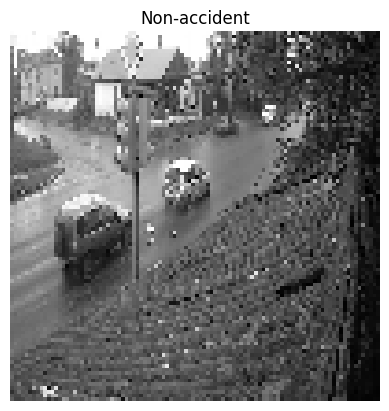

In [7]:
plt.imshow(all_images[random_index], cmap='gray')
plt.axis('off')
if random_index < len(accident_images):
    plt.title("Accident")
else:
    plt.title("Non-accident")
plt.show()

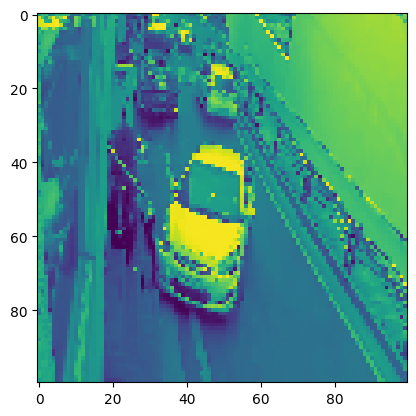

In [8]:
plt.imshow(all_images[7]);

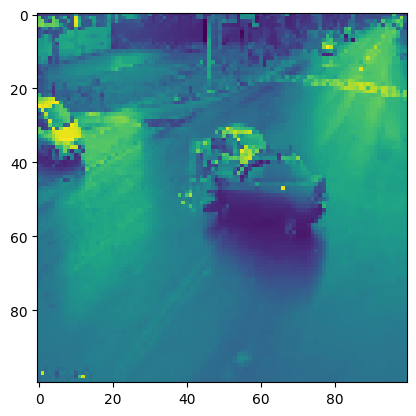

In [9]:
plt.imshow(all_images[120]);

In [10]:
random_indices = np.random.permutation(len(all_images))
all_images_shuffled = all_images[random_indices]
all_labels_shuffled = all_labels[random_indices]

In [11]:
all_images_shuffled = all_images_shuffled.reshape((-1, 100, 100, 1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras import layers, models, callbacks

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


c:\Users\girid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
from tensorflow.keras.regularizers import l2
layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01))


<Dense name=dense_2, built=False>

In [15]:
layers.Dropout(0.3) 

<Dropout name=dropout, built=False>

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
#history = model.fit(all_images_shuffled, all_labels_shuffled, epochs=100, batch_size=32)

In [18]:
from sklearn.model_selection import train_test_split

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images_shuffled, all_labels_shuffled, test_size=0.2, random_state=42)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [21]:
from keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, verbose=1, min_lr=1e-5)


In [22]:

# Training the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler,early_stopping])


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.5207 - loss: 0.7593 - val_accuracy: 0.4966 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.5240 - loss: 0.6921 - val_accuracy: 0.5310 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.5246 - loss: 0.6915 - val_accuracy: 0.5931 - val_loss: 0.6842 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.5754 - loss: 0.6848 - val_accuracy: 0.4966 - val_loss: 0.6978 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.5957 - loss: 0.6926 - val_accuracy: 0.5724 - val_loss: 0.6848 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.6323 - loss: 0.6564 - val_accuracy: 0.5724 - val_loss: 0.6381 - learning_rate: 0.0010
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.6852 - loss: 0.

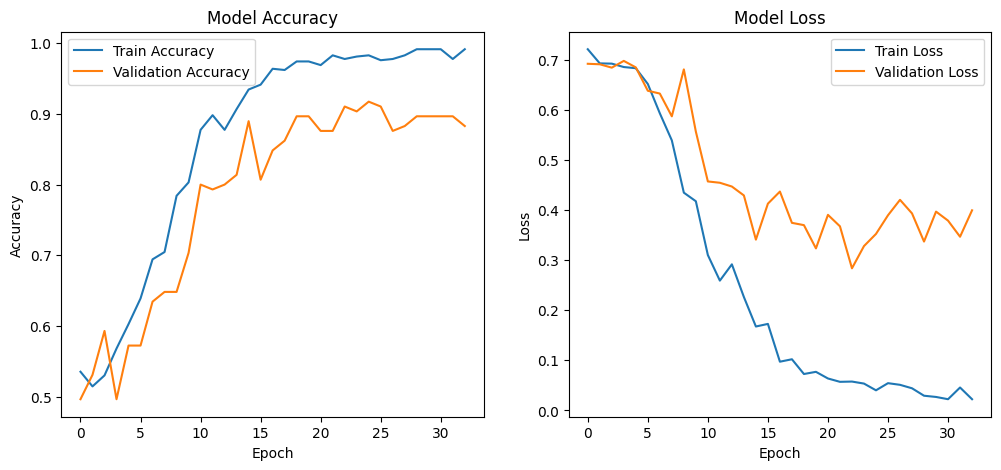

In [23]:
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [24]:
model.save('accidetect.keras')

In [25]:
loss, accuracy = model.evaluate(all_images_shuffled, all_labels_shuffled)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9651 - loss: 0.1096
Test loss: 0.09722428023815155
Test accuracy: 0.9709944725036621


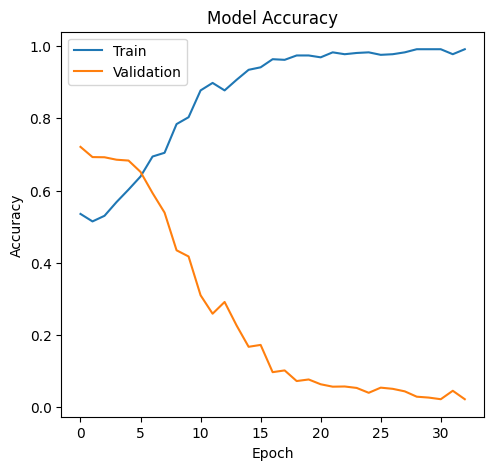

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


In [27]:
probabilities = model.predict(all_images_shuffled)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [28]:
predictions = np.where(probabilities > 0.5, 1, 0)

In [29]:
from sklearn.metrics import classification_report
report = classification_report(all_labels_shuffled, predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       355
         1.0       0.97      0.98      0.97       369

    accuracy                           0.97       724
   macro avg       0.97      0.97      0.97       724
weighted avg       0.97      0.97      0.97       724



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


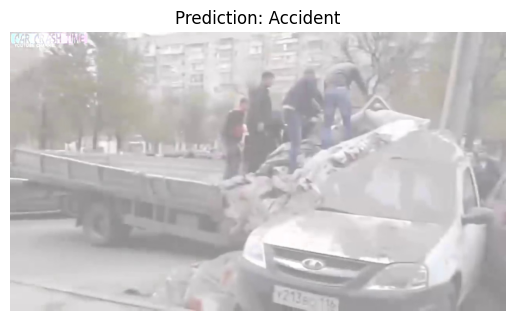

In [30]:
def predict_single_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = img.reshape((1, 100, 100, 1)) 

    probabilities = model.predict(img)

    if probabilities[0][0] > 0.5:
        prediction = "Accident"
    else:
        prediction = "Non-accident"
    
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {prediction}")
    plt.axis('off')
    plt.show()

image_path = r"data/test/Accident/test2_4.jpg"
predict_single_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


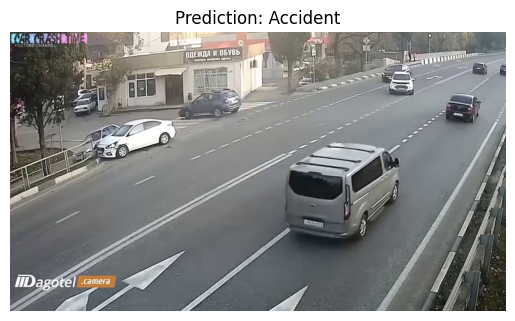

In [31]:
image_path = r"data/test/Non Accident/test4_60.jpg"
predict_single_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


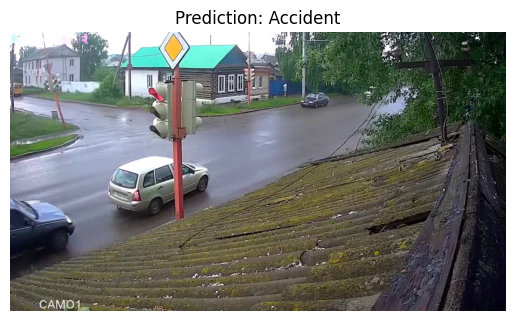

In [32]:
image_path = r"data/test/Non Accident/test29_7.jpg"
predict_single_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


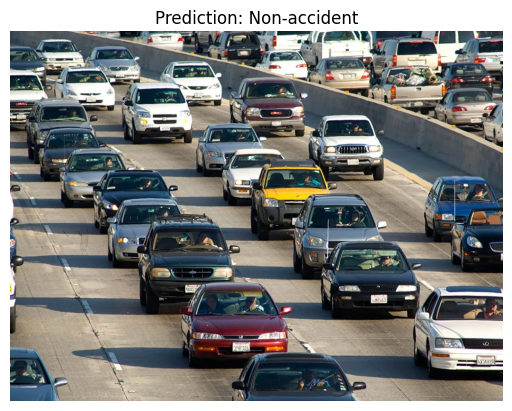

In [33]:
image_path = r"highway-traffic.jpg"
predict_single_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


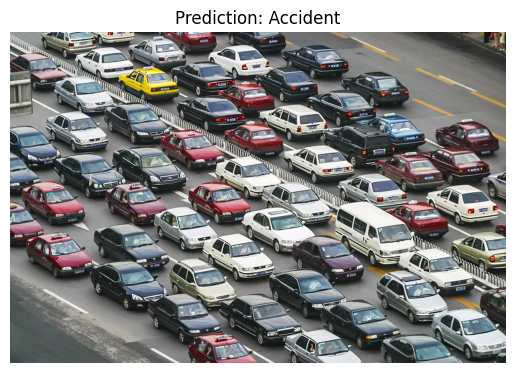

In [34]:
image_path = r"traffic-jam-getty.webp"
predict_single_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


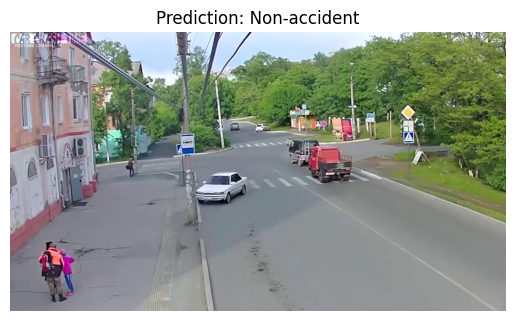

In [35]:
image_path = r"data/val/Non Accident/test28_13.jpg"
predict_single_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


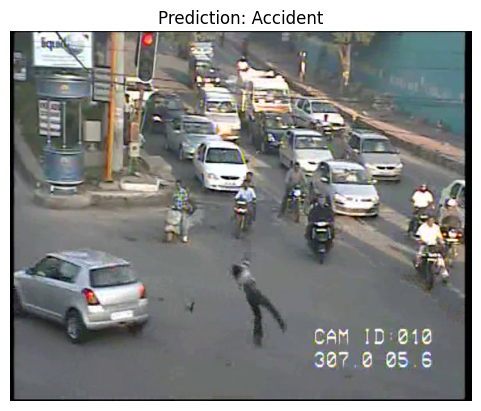

In [36]:
image_path = r"data/val/Accident/acc1 (4).jpg"
predict_single_image(image_path)

In [39]:
def predict_from_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Preprocess the frame
        img = cv2.resize(frame, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255.0
        img = img.reshape((1, 100, 100, 1))
        
        # Predict using the model
        probabilities = model.predict(img)
        prediction = "Accident" if probabilities[0][0] > 0.5 else "Non-accident"
        
        # Display the frame with prediction
        cv2.putText(frame, f"Prediction: {prediction}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0, 255, 0) if prediction == "Non-accident" else (0, 0, 255), 2, cv2.LINE_AA)
        cv2.imshow('Video Prediction', frame)
        
        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    # Inside the loop, write the frame
    out.write(frame)

    # Release the writer
    out.release()


In [38]:
video_path = r"test_vedio.mp4"
predict_from_video(video_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━